In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import scipy.stats as st

## "All of Statistics: A Concise Course in Statistical Inference" 

### Chapter 9: Parametric Inference

**Problem 2** Let $X_1,\dots,X_n \sim \text{Uniform}(a,b)$, where $a$ and $b$ are unknown parameters and $a<b$.

*(Did parts (a)-(c) on paper)*

(d) Let $\hat\tau$ be the MLE of $\tau$. Let $\tilde\tau$ be the nonparametric plug-in estimate of $\tau = \int x \text{d} F(x)$. Suppose that $a=1$, $b=3$, and $n=10$. Find the MSE of $\hat\tau$ by simulation. Find the MSE of $\tilde\tau$ analytically. Compare.

The plug-in estimate for $\tau$ is simply the sample mean, which has variance $\mathbb{V}(\bar X_n) = \frac{\mathbb{V}(X_1)}{n} = \frac{(b-a)^2}{12n}$. Because the sample mean is an unbiased estimate, the MSE is equal to the variance: $MSE(\tilde\tau) = \frac{(b-a)^2}{12n} = \frac{4}{120} = \frac{1}{30}$.

The MLE is given by $\tilde\tau  = \frac{\tilde a  + \tilde b}{2}$ (Delta Method), where the MLEs for $a$ and $b$ are given by $\tilde a = \min\{X_1,\dots,X_n\}$ and $\tilde b = \max\{X_1,\dots,X_n\}$. Let us estimate the variance of $\tilde\tau  = \frac{\min\{X_1,\dots,X_n\}  + \max\{X_1,\dots,X_n\}}{2}$ by simulation.

In [2]:
def tau_hat(a):
    return (a.min(axis=1) + a.max(axis=1))/2


rv = st.uniform(loc=1, scale=2)

size = 10
samples = 10000

a = rv.rvs(size = size*samples).reshape(samples, size)

# np.square(tau_hat(a) - a.mean(axis=1)).mean()

np.square(tau_hat(a) - 2).mean()

0.014652599442181368

Thus, $MSE(\hat\tau) \approx 0.015$ whereas $MSE(\tilde\tau) = 1/30 \approx 0.033$ is almost double.

**Problem 3** Let $X_1,\dots,X_n \sim N(\mu, \sigma^2)$. Let $\tau$ be the .95 percentile. For the data given bellow, find the MLE $\hat\tau$, the standard error using the delta method, and the standard error using the parametric bootstrap.

In [3]:
data = np.array([3.23, -2.50, 1.88, -0.68, 4.43, 0.17, 1.03, -0.07, -0.01, 0.76, 1.76, 3.18, 0.33,
                 -0.31, 0.30, -0.61, 1.52, 5.43, 1.54, 2.28, 0.42, 2.33, -1.03, 4.00, 0.39])

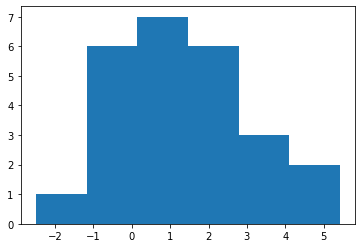

In [4]:
plt.hist(data, bins='auto');

The MLE is $\hat\tau = \hat\mu + \Phi^{-1}(0.95)\hat\sigma$, where $\hat\mu = \bar X_n$ and $\hat\sigma = \sqrt{1/n \sum_{i=1}^n (X_i - \bar X_n)^2}$.

The estimated standard error from the delta method is $\hat{se}(\hat\tau) = \frac{\hat\sigma}{\sqrt{n}} \sqrt{1 + \Phi^{-1}(0.95)^2 / 2}$.

In [5]:
mu_hat =  data.mean()
sigma_hat = data.std()
mle = mu_hat + st.norm.ppf(.95)*sigma_hat
n = data.size

se_hat = (sigma_hat / np.sqrt(n)) * np.sqrt(1 + st.norm.ppf(.95)**2 / 2)

mle, se_hat

(4.180410658803283, 0.5575801038636546)

In [6]:
mu_hat =  data.mean()
sigma_hat = data.std()
n = data.size
B = 1000

def param_bootstrap1(mu_hat, sigma_hat, n, B):
    mle = mu_hat + st.norm.ppf(.95)*sigma_hat
    resamplings = st.norm.rvs(loc=mu_hat, scale=sigma_hat, size=n*B).reshape(B, n)
    replications = resamplings.mean(axis=1) + st.norm.ppf(.95) * resamplings.std(axis=1)
    return np.sqrt(np.square(replications - mle).mean())

param_bootstrap1(mu_hat, sigma_hat, n, B)

0.5562427560783373

The two standard errors are very close!

**Problem 7 (Comparing two treatments)** $n_1$ people are given treatment 1 and $n_2$ people are given treatment 2. Let $X_1$ be the number of people on  treatment 1 who respond favorably to the treatment and let $X_2$ be the number of people in treatment 2 who respond favorably. Assume that $X_1\sim\text{Binomial}(n_1,p_1)$ and $X_2\sim\text{Binomial}(n_2,p_2)$. Let $\psi = p_1 - p_2$.

*Did (a)-(c) on paper*

(d) Suppose that $n_1=n_2=200$, $X_1=160$ and $X_2=148$. Find $\hat\psi$. Find an approximate 90 percent confidence interval for $\psi$ using the delta method and the parametric bootstrap.

$\hat\psi = \hat p_1 - \hat p_2 = X_1/n_1 + X_2/n_2$. Think of $(X_1, X_2)$ as single sample with the joint distribution being the product of two binomial distributions distributions. The delta method gives us $\hat{se} = \sqrt{\frac{\hat p_1(1  - \hat p_1)}{n_1} + \frac{\hat p_2(1  -  \hat p_2)}{n_2}} = \sqrt{\frac{X_1/n_1 (1  - X_1/n_1)}{n_1} + \frac{X_2/n_2(1  -  X_2/n_2)}{n_2}}$.

In [7]:
n1 = 200
n2 = 200
X1 = 160
X2 = 148

p1 = X1/n1 # MLE 
p2 = X2/n2 # MLE
psi_hat = p1 - p2


delta_error = math.sqrt( p1*(1 - p1) / n1 + (p2)*(1 - p2) / n2 )

print(p1, p2, psi_hat, delta_error)

print(f'The 90% confidence interval coming from the delta method is ({psi_hat - delta_error*st.norm.ppf(.95)} , {psi_hat + delta_error*st.norm.ppf(.95)})')

0.8 0.74 0.06000000000000005 0.04197618372363071
The 90% confidence interval coming from the delta method is (-0.009044678043395274 , 0.12904467804339537)


In [8]:
st.binom.rvs(n1, p1, size=10)

array([168, 168, 152, 155, 164, 159, 161, 160, 152, 162])

In [9]:
B = 1000

def param_bootstrap2(n1, X1, n2, X2, B):
    p1 = X1/n1
    p2 = X2/n2
    mle = p1 - p2
    resamplings1 = st.binom.rvs(n1, p1, size=B)
    resamplings2 = st.binom.rvs(n2, p2, size=B)
    replications = resamplings1/n1 - resamplings2/n2
    return np.sqrt(np.square(replications - mle).mean())

bootstrap_error = param_bootstrap2(n1, X1, n2, X2, B)

print(f'The normal 90% confidence interval coming from the parametric bootstrap is ({psi_hat - bootstrap_error*st.norm.ppf(.95)} , {psi_hat + bootstrap_error*st.norm.ppf(.95)})')

The normal 90% confidence interval coming from the parametric bootstrap is (-0.006471219447842319 , 0.12647121944784243)


**Problem 9** Let $X_1,\dots,X_n \sim N(\mu,1)$. Let $\theta = e^\mu$ and let $\hat\theta = e^{\bar X_n}$ be the MLE. Create a data set (using $\mu=5$) consisting of $n=100$ observations.

(a) Use the delta method to get $\hat{se}$ and a 95 percent confidence interval for $\theta$. Use the parametric bootstrap to get $\hat se$ and a 95 percent confidence interval for $\theta$. Use the nonparametric bootstrap to get $\hat se$ and a 95 percent confidence interval for $\theta$. Compare your answers.

(b) Plot a histogram of the bootstrap replications of the parametric and nonparametric bootstraps. These are estimates of the distribution of $\hat\theta$. The delta method also gives an approximation to this distribution, namely $N(\hat\theta,\hat{se}^2)$. Compare these to the true sampling distribution of $\hat\theta$ (which you can get by simulation). Which approximation is closer to the true distribution?

Delta method standard error: $\hat{se} = |g'(\hat\mu)| \hat{se}(\hat\mu)  = e^{\bar X_n}/n$,  where $g(\mu)=e^\mu$ and $\hat\mu  = \bar X_n$.

In [10]:
#Standard errors comparison

mu = 5
size = 100
data = st.norm.rvs(loc=mu, size=size)
B = 1000

sample_mean = data.mean()
estimate = math.exp(sample_mean)
se_delta = estimate / math.sqrt(size)

def param_bootstrap3(sample_mean, size, B):
    estimate = math.exp(sample_mean)
    resamplings = st.norm.rvs(loc=sample_mean, size=size*B).reshape(B, size)
    replications = np.exp(resamplings.mean(axis=1))
    return np.sqrt(np.square(replications - estimate).mean())

def nonparam_bootstrap1(data, B):
    size = data.size
    estimate = math.exp(data.mean())
    reindex = np.random.choice(np.arange(size), size*B)
    resamplings = data[reindex].reshape(B, size)
    replications = np.exp(resamplings.mean(axis=1))
    return np.sqrt(np.square(replications - estimate).mean())

display(estimate, se_delta, param_bootstrap3(data.mean(), size, B), nonparam_bootstrap1(data, B))

150.90843498482369

15.090843498482368

14.830994619167114

14.955125608906386

true value = 148.4131591025766
estimate = 146.97483564985365


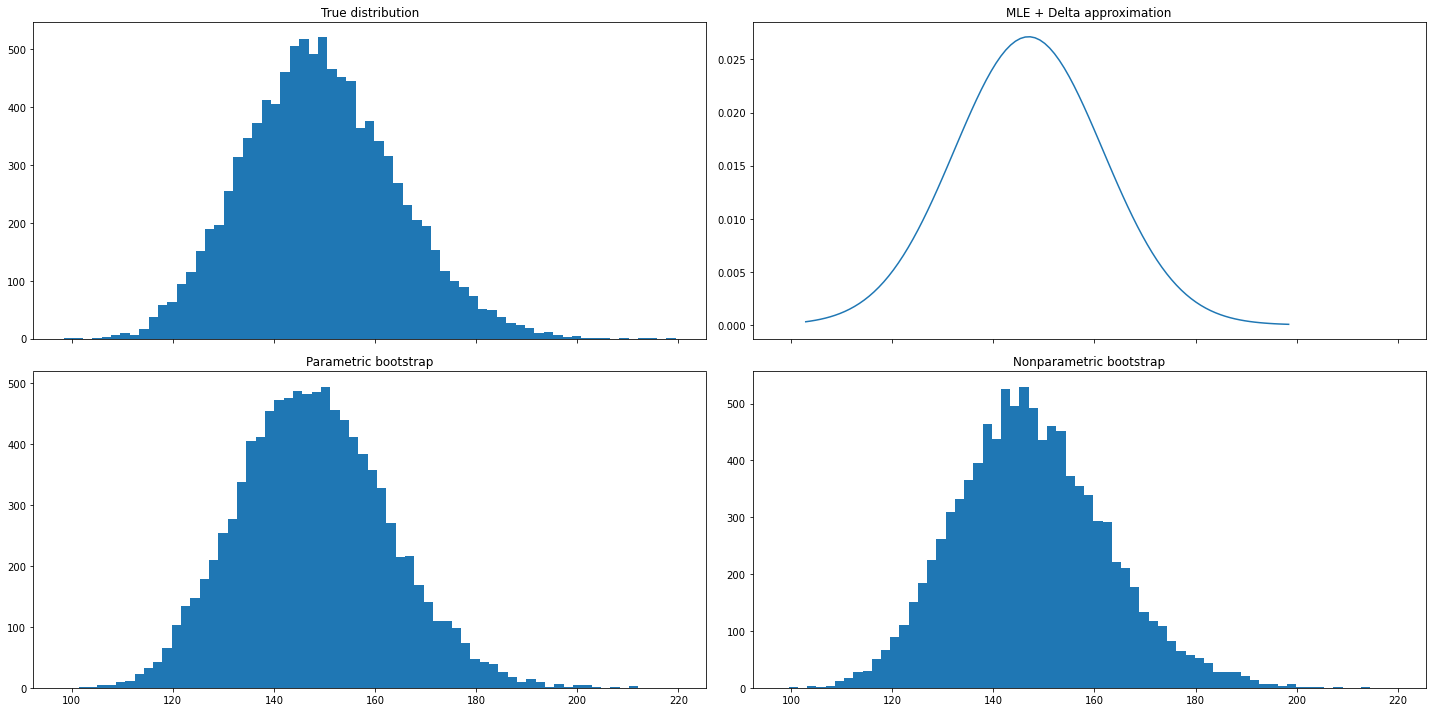

In [11]:
# Histogram comparisons

mu = 5
size = 100
data = st.norm.rvs(loc=mu, size=size)
sample_mean = data.mean()
estimate = math.exp(sample_mean)
se_delta = estimate / math.sqrt(size)
B = 10000

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, figsize=[20, 10])

ax1.set_title('True distribution')
true_distr = np.exp(st.norm.rvs(loc=mu, size=size*10_000).reshape(10_000, size).mean(axis=1))
ax1.hist(true_distr, bins='auto')

ax2.set_title('MLE + Delta approximation')
x = np.linspace(math.exp(sample_mean) - se_delta*3, math.exp(sample_mean) + se_delta*3.5, 100)
ax2.plot(x, st.norm.pdf(x, loc=estimate, scale=se_delta))

ax3.set_title('Parametric bootstrap')
param_resamplings = st.norm.rvs(loc=sample_mean, size=size*B).reshape(B, size)
param_replications = np.exp(param_resamplings.mean(axis=1))
ax3.hist(param_replications, bins='auto')

ax4.set_title('Nonparametric bootstrap')
reindex = np.random.choice(np.arange(size), size*B)
nonparam_resamplings = data[reindex].reshape(B, size)
nonparam_replications = np.exp(nonparam_resamplings.mean(axis=1))
ax4.hist(nonparam_replications, bins='auto')

plt.tight_layout()

print(f'true value = {math.exp(mu)}\nestimate = {math.exp(sample_mean)}')

true value = 148.4131591025766
estimate = 125.58396893457719


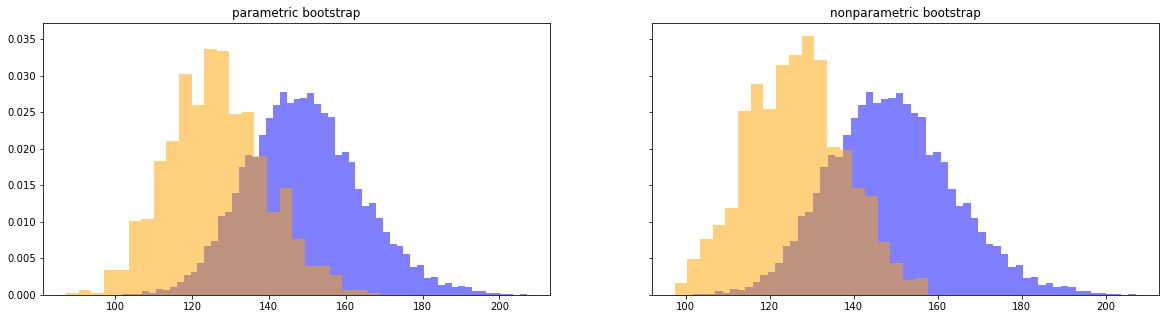

In [12]:
# Histogram comparisons, comparing both bootstrap methods to the real distribution

mu = 5
size = 100
data = st.norm.rvs(loc=mu, size=size)
sample_mean = data.mean()
B = 1000

true_distr = np.exp(st.norm.rvs(loc=mu, size=size*10_000).reshape(10_000, size).mean(axis=1))

fig, (ax1, ax2)  =  plt.subplots(1,2, sharey=True, figsize=[20, 5])

ax1.set_title('parametric bootstrap')
ax1.hist(true_distr, density=True, bins='auto', color='blue', alpha=0.5)
reindex = np.random.choice(np.arange(size), size*B)
param_resamplings = st.norm.rvs(loc=sample_mean, size=size*B).reshape(B, size)
param_replications = np.exp(param_resamplings.mean(axis=1))
ax1.hist(param_replications, density=True, bins='auto', color='orange', alpha=0.5);

ax2.set_title('nonparametric bootstrap')
ax2.hist(true_distr, density=True, bins='auto', color='blue', alpha=0.5)
nonparam_resamplings = data[reindex].reshape(B, size)
nonparam_replications = np.exp(nonparam_resamplings.mean(axis=1))
ax2.hist(nonparam_replications, density=True, bins='auto', color='orange', alpha=0.5);

print(f'true value = {math.exp(mu)}\nestimate = {math.exp(sample_mean)}')

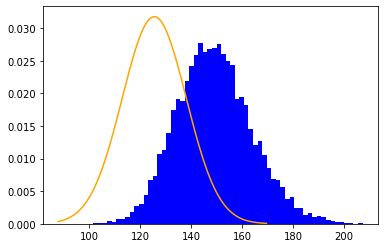

In [13]:
plt.hist(true_distr, bins='auto', color='blue', density=True)
estimate = math.exp(sample_mean)
se_delta = estimate / math.sqrt(size)
x = np.linspace(math.exp(sample_mean) - se_delta*3, math.exp(sample_mean) + se_delta*3.5, 100)
plt.plot(x, st.norm.pdf(x, loc=estimate, scale=se_delta), color='orange');

**Problem 10**  Let $X_1,\dots,X_n \sim \text{Uniform}(0,\theta)$. The MLE is $\hat\theta = X_{(n)} = \max\{X_1\dots,X_n\}$. Generate a data set of size 50 with $\theta=1$.
1. Find the distribution of $\hat\theta$ analytically. Compare the true distribution of $\hat\theta$ to the histograms from the parametric and nonparametric  bootstraps.
2. This is a case where the parametric bootstrap does very poorly. Show that for the parametric bootstrap $P(\hat\theta^* = \hat\theta) = 0$, but for the nonparametric bootstrap $P(\hat\theta^* = \hat\theta) \approx .632$. Hint: show that $P(\hat\theta^* = \hat\theta) = 1 - (1 - (1/n))^n$, then take the limit as $n$ gets large. What is the implication of this?

Part 2 is not hard: $\hat\theta^* = \hat\theta$ is the case precisely when the largest $X_i$ is part of the bootstrap sample. The probability randomly choosing $n$ of the $X_i$ with replacement and not picking the maximum (or any specific $X_i$ for that matter) is $1 - (1 - (1/n))^n$. For the parametric bootstrap we are resampling from $\text{Uniform}(0,\hat\theta)$ and finding the maximum, which is  the replication $\hat\theta^*$. Of course, the likelihood that this maximum is equak to $\hat\theta$ is 0.

Now onto part 1: The distribution of $\hat\theta = X_{(n)} = \max\{X_1\dots,X_n\}$ is $\text{Beta}(n-1,2)$ and has PDF $f(x) = nx^{n-1}$ and CDF $F(x) = x^n = \mathbb{P}(X_i \le x)^n$.

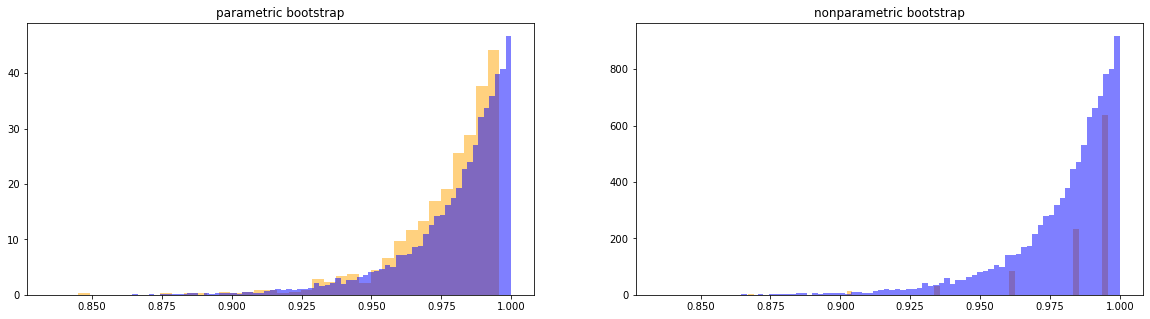

In [14]:
B=1000
size=50
rv = st.uniform()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])

data = rv.rvs(size=size)
estimate = data.max()
true_dist = rv.rvs(size=size*10_000).reshape(10_000, size).max(axis=1) # True sampling distribution (approximation by simulation)

ax1.set_title('parametric bootstrap')
param_resamplings = st.uniform.rvs(scale=estimate, size=size*B).reshape(B, size)
param_replications = param_resamplings.max(axis=1)
ax1.hist(param_replications, bins='auto', alpha=0.5, color='orange', density=True)
ax1.hist(true_dist, bins='auto', alpha=0.5, color='blue', density=True)

ax2.set_title('nonparametric bootstrap')
reindex = np.random.choice(np.arange(size), B*size)
nonparam_resamplings = data[reindex].reshape(B, size)
nonparam_replications = nonparam_resamplings.max(axis=1)
ax2.hist(nonparam_replications, bins='auto', alpha=0.5, color='orange')
ax2.hist(true_dist, bins='auto', alpha=0.5, color='blue');
